Pandas is a popular Python module that provides high performance data 
structures and data analysis tools. Pandas is widely used to transform 
raw data for data analysis and machine learning. We will learn: 

• data frames and data series 

• reading from files 

• data transformation 

• data visualization 

• statistical analysis

Wes McKinney developed on Pandas and open sourced it in 2009. Later Chang She become the primary contributor. 

## Data frames and Data series

Series - is a one-dimensional Python object that corresponds to one column 
in a table.

In [55]:
'''
First things first, let's import pandas
'''
import pandas as pd
import numpy as np

Creating a data series from a list

In [56]:
list1 = ['Grapes', 'Apples', 'Oranges', 'Bananas']
s1 = pd.Series(list1)
print(list1, type(list1))
print(type(s1))
print(s1)

['Grapes', 'Apples', 'Oranges', 'Bananas'] <class 'list'>
<class 'pandas.core.series.Series'>
0     Grapes
1     Apples
2    Oranges
3    Bananas
dtype: object


Notice that rows are given numbers, these numbers are known as indices. Indices starts from 0 and go up.  

We can provide custom index as well. 

In [57]:
# defining list2 with indices
list2 = ['GR', 'AP', 'OR', 'BA']

# In series1 we say index=list2
series1 = pd.Series(list1, index=list2)
print(series1)

GR     Grapes
AP     Apples
OR    Oranges
BA    Bananas
dtype: object


Now let us define a dictionary and convert it into a series.

In [58]:
d1 = {'Z': 'Zynga', 'U': 'Uber', 'G':'Google'}
ds1 = pd.Series(d1)
print(ds1)

Z     Zynga
U      Uber
G    Google
dtype: object


Let's create a series with company name as index and its current stock price as 
value. Notice that in the code below, we have a dictionary with two keys 
having None as their values.

In [59]:
d2= {'Amazon': 2100.0, 'Nvidia': '350'}

companies = pd.Series(d2, name='Price')

print(companies)

Amazon    2100.0
Nvidia       350
Name: Price, dtype: object


In [60]:
d2= {'Amazon': 852, 'Nvidia': None, 'Alphabet': 856, 'Toyota': '112', \
    'GE': 29, 'Ford': 12, 'Marriot': None, 'amazon': 1000}

companies = pd.Series(d2, name='Price')

print(companies)

Amazon       852
Nvidia      None
Alphabet     856
Toyota       112
GE            29
Ford          12
Marriot     None
amazon      1000
Name: Price, dtype: object


Using the index we can get the corresponding stock prices. Below we are 
retrieving the stock price of Ford.

In [61]:
print(companies['Ford'])

12


In [62]:
print(companies[['Ford']])

Ford    12
Name: Price, dtype: object


We can also get stock prices for more companies. We have to supply the indices 
that we are interested in as a list.

In [63]:
print(companies[['Ford', 'GE']])

Ford    12
GE      29
Name: Price, dtype: object


Membership can be checked using the 'in' keyword.

In [64]:
print('Amazon' in companies)
print('Apple' in companies)

True
False


If we want to know companies for which we don't have stock price, then we have 
to use the isnull(). True will be returned for the indices that don't have a 
value and False for the indices that have 
a value.

In [65]:
d2= {'Amazon': 3202, 'Nvidia': None, 'Alphabet': 2349, 'Toyota': 'NaN', \
    'GE': 14, 'Ford': 16, 'Marriot': None, 'amazon': 3000}

companies = pd.Series(d2, name='Price')

print(companies)

Amazon      3202
Nvidia      None
Alphabet    2349
Toyota       NaN
GE            14
Ford          16
Marriot     None
amazon      3000
Name: Price, dtype: object


In [66]:
print(companies)
print("+++++++++++++++++")
print(companies.isnull())

Amazon      3202
Nvidia      None
Alphabet    2349
Toyota       NaN
GE            14
Ford          16
Marriot     None
amazon      3000
Name: Price, dtype: object
+++++++++++++++++
Amazon      False
Nvidia       True
Alphabet    False
Toyota      False
GE          False
Ford        False
Marriot      True
amazon      False
Name: Price, dtype: bool


A dataframe is a tabular data structure that consists of rows and columns. 
Dataframe is nothing but a collection of series.

Let's create a dataframe using a dicitonary as shown below.

In [67]:
c1= {'Name': ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
            'Founded': [1994, 1923, 1937, 2006, 1903, 1927], 
             'Price': [852, 111.2, 112, 15.2, 12.5, 88.31]}

companies = pd.DataFrame(c1)
print(companies)

      Name  Founded   Price
0   Amazon     1994  852.00
1       GE     1923  111.20
2   Toyota     1937  112.00
3  Twitter     2006   15.20
4     Ford     1903   12.50
5  Marriot     1927   88.31


In [68]:
c1= {'Name': ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
     'Founded': [1994, 1923, 1937, 2006, 1903, 1927], 
     'Price': [852, 111.2, 112, 15.2, 12.5, 88.31]}

companies = pd.DataFrame(c1, columns=['Name', 'Founded', 'Price'])

print(companies)

      Name  Founded   Price
0   Amazon     1994  852.00
1       GE     1923  111.20
2   Toyota     1937  112.00
3  Twitter     2006   15.20
4     Ford     1903   12.50
5  Marriot     1927   88.31


In [69]:
c1= {'Founded': [1994, 1923, 1937, 2006, 1903, 1927],
     'Price': [852, 111.2, 112, 15.2, 12.5, 88.31]}

# here Name is a separate list
Name = ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot']
cc = pd.DataFrame(c1, index=Name)

print(cc)

         Founded   Price
Amazon      1994  852.00
GE          1923  111.20
Toyota      1937  112.00
Twitter     2006   15.20
Ford        1903   12.50
Marriot     1927   88.31


In [70]:
"""
In-class activity: Create a data series which comprises of names of 5 
US capitals. Print the contents of the data series.
"""

'\nIn-class activity: Create a data series which comprises of names of 5 \nUS capitals. Print the contents of the data series.\n'

In [71]:
"""
In-class activity: To the above data series include state of 
each capital as an index. 
"""

'\nIn-class activity: To the above data series include state of \neach capital as an index. \n'

## Reading files

Reading a csv file. 

In [72]:
movies = pd.read_csv('alldata\imdb_movie\movie_metadata.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [73]:
print(movies.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [74]:
print(movies.dtypes)

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [75]:
print(movies.shape)

(5043, 28)


In [76]:
# for number of rows use shape[0]
print(movies.shape[0])

5043


In [77]:
# for number of columns use shape[1]
print(movies.shape[1])

28


In [78]:
print(movies, type(movies))

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0    

We can create a series from the movies dataframe. 

In [79]:
movies_dir = movies['director_name']
print(movies_dir.head())

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4          Doug Walker
Name: director_name, dtype: object


Let's create a new dataframe with columns: 
movie_title, duration, budget, gross, genres, director_name.

In [80]:
newmovies = movies[['movie_title', 'duration', 'budget', 'gross', 'genres', 'director_name']]
print(newmovies.head())

                                         movie_title  duration       budget  \
0                                            Avatar      178.0  237000000.0   
1          Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                           Spectre      148.0  245000000.0   
3                             The Dark Knight Rises      164.0  250000000.0   
4  Star Wars: Episode VII - The Force Awakens    ...       NaN          NaN   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
4          NaN                      Documentary        Doug Walker  


In [81]:
print(newmovies.shape)

(5043, 6)


We can use sort_values() to sort a dataframe.

In [82]:
print(newmovies.sort_values('director_name').head())

               movie_title  duration      budget       gross  \
4605  The Helix... Loaded       97.0   1000000.0         NaN   
4314               Circle       87.0         NaN         NaN   
3497              Get Low      100.0   7500000.0   9176553.0   
2182           Date Movie       85.0  20000000.0  48546578.0   
2909          The Funeral       99.0  12500000.0   1227324.0   

                                      genres    director_name  
4605  Action|Adventure|Comedy|Fantasy|Sci-Fi    A. Raven Cruz  
4314    Drama|Horror|Mystery|Sci-Fi|Thriller       Aaron Hann  
3497                           Drama|Mystery  Aaron Schneider  
2182                          Comedy|Romance    Aaron Seltzer  
2909                             Crime|Drama     Abel Ferrara  


In [83]:
newmovies.sort_values('director_name').head()

,movie_title,duration,budget,gross,genres,director_name
4605,The Helix... Loaded,97.0,1000000.0,NaN,Action|Adventure|Comedy|Fantasy|Sci-Fi,A. Raven Cruz
4314,Circle,87.0,NaN,NaN,Drama|Horror|Mystery|Sci-Fi|Thriller,Aaron Hann
3497,Get Low,100.0,7500000.0,9176553.0,Drama|Mystery,Aaron Schneider
2182,Date Movie,85.0,20000000.0,48546578.0,Comedy|Romance,Aaron Seltzer
2909,The Funeral,99.0,12500000.0,1227324.0,Crime|Drama,Abel Ferrara


Notice that not all values in our data frame are finite. So, now we want to drop 
rows that have NaN in any column. 

## Data Transformation

In [84]:
# Example of shallow copy

listA = [12, 20]

listB = listA # shallow copy

print(listA)
print(listB)


print("++++++++++++++")
listB.append(-1000)

print(listA)
print(listB)

[12, 20]
[12, 20]
++++++++++++++
[12, 20, -1000]
[12, 20, -1000]


In [85]:
# Example of deep copy
import copy

listA2 = [12, 20]

listB2 = listA2.copy() # deep copy

print(listA2)
print(listB2)


print("++++++++++++++")
listB2.append(-3000)

print(listA2)
print(listB2)

[12, 20]
[12, 20]
++++++++++++++
[12, 20]
[12, 20, -3000]


### Dropping na 

In [86]:
newmovies1 = newmovies.copy(deep=True) # making a deep copy
newmovies1.dropna(how='any', inplace=True) # dropping rows that have NaN anywhere inplace, so the newmovies1 gets modified

In [87]:
print(newmovies1.head())
print(newmovies1.shape)

                                 movie_title  duration       budget  \
0                                    Avatar      178.0  237000000.0   
1  Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                   Spectre      148.0  245000000.0   
3                     The Dark Knight Rises      164.0  250000000.0   
5                               John Carter      132.0  263700000.0   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
5   73058679.0          Action|Adventure|Sci-Fi     Andrew Stanton  
(3890, 6)


In [88]:
# Dropping na in only a subset of columns with how = "any"

newmovies2 = newmovies.copy(deep=True)
newmovies2.dropna(subset=['duration','budget'], how='any', inplace=True)

In [89]:
print(newmovies2.head())

                                 movie_title  duration       budget  \
0                                    Avatar      178.0  237000000.0   
1  Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                   Spectre      148.0  245000000.0   
3                     The Dark Knight Rises      164.0  250000000.0   
5                               John Carter      132.0  263700000.0   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
5   73058679.0          Action|Adventure|Sci-Fi     Andrew Stanton  


In [90]:
print(newmovies2.shape)

(4546, 6)


In [91]:
newmoviesA = newmovies.copy(deep=True) # making a deep copy of new movies

In [92]:
# Dropping na in only subset of oclumns with how="all"

newmoviesA.dropna(subset=['duration','budget'], how='all', inplace=True)

In [93]:
print(newmoviesA.shape)

(5033, 6)


In [94]:
# getting rows where the 'gross' > 350000

new_gross = newmovies[newmovies['gross']>350000]
print(new_gross.shape)
print(new_gross.head())

(3759, 6)
                                 movie_title  duration       budget  \
0                                    Avatar      178.0  237000000.0   
1  Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                   Spectre      148.0  245000000.0   
3                     The Dark Knight Rises      164.0  250000000.0   
5                               John Carter      132.0  263700000.0   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
5   73058679.0          Action|Adventure|Sci-Fi     Andrew Stanton  


## Statistical Analysis

In [95]:
print(newmovies1.describe())

          duration        budget         gross
count  3890.000000  3.890000e+03  3.890000e+03
mean    109.896401  4.520391e+07  5.106809e+07
std      22.706775  2.224177e+08  6.980668e+07
min      34.000000  2.180000e+02  1.620000e+02
25%      95.000000  1.000000e+07  6.844452e+06
50%     106.000000  2.400000e+07  2.799697e+07
75%     120.000000  5.000000e+07  6.540649e+07
max     330.000000  1.221550e+10  7.605058e+08


We can find how many values in each column of newmovies has NAN using isnull().

In [96]:
print(newmovies.isnull().sum())

movie_title        0
duration          15
budget           492
gross            884
genres             0
director_name    104
dtype: int64


### Filling na in duration column 

In [97]:
newmovies3 = newmovies.copy(deep=True)
print(newmovies3.isnull().sum())
print(newmovies3.describe())
print("+++++++++++++++++++")
print("Isnull after filling the NA in the Duration column")
newmovies3['duration'].fillna(value=90, inplace=True)
print(newmovies3.isnull().sum())
print(newmovies3.describe())

movie_title        0
duration          15
budget           492
gross            884
genres             0
director_name    104
dtype: int64
          duration        budget         gross
count  5028.000000  4.551000e+03  4.159000e+03
mean    107.201074  3.975262e+07  4.846841e+07
std      25.197441  2.061149e+08  6.845299e+07
min       7.000000  2.180000e+02  1.620000e+02
25%      93.000000  6.000000e+06  5.340988e+06
50%     103.000000  2.000000e+07  2.551750e+07
75%     118.000000  4.500000e+07  6.230944e+07
max     511.000000  1.221550e+10  7.605058e+08
+++++++++++++++++++
Isnull after filling the NA in the Duration column
movie_title        0
duration           0
budget           492
gross            884
genres             0
director_name    104
dtype: int64
          duration        budget         gross
count  5043.000000  4.551000e+03  4.159000e+03
mean    107.149911  3.975262e+07  4.846841e+07
std      25.177366  2.061149e+08  6.845299e+07
min       7.000000  2.180000e+02  1.6200

In [98]:
print(newmovies3.describe())

          duration        budget         gross
count  5043.000000  4.551000e+03  4.159000e+03
mean    107.149911  3.975262e+07  4.846841e+07
std      25.177366  2.061149e+08  6.845299e+07
min       7.000000  2.180000e+02  1.620000e+02
25%      93.000000  6.000000e+06  5.340988e+06
50%     103.000000  2.000000e+07  2.551750e+07
75%     118.000000  4.500000e+07  6.230944e+07
max     511.000000  1.221550e+10  7.605058e+08


In [99]:
print(newmovies.describe())

          duration        budget         gross
count  5028.000000  4.551000e+03  4.159000e+03
mean    107.201074  3.975262e+07  4.846841e+07
std      25.197441  2.061149e+08  6.845299e+07
min       7.000000  2.180000e+02  1.620000e+02
25%      93.000000  6.000000e+06  5.340988e+06
50%     103.000000  2.000000e+07  2.551750e+07
75%     118.000000  4.500000e+07  6.230944e+07
max     511.000000  1.221550e+10  7.605058e+08


In [100]:
# mean of a column in a dataframe

print(newmovies["duration"].mean())

107.2010739856802


In [101]:
"""
In-class activity: From the movies data frame, create a new data 
frame that comprises of movie title, duration, budget and gross. 
1) Find the number of NaN in gross. 
2) Replace NaN in gross with the mean of gross.
"""
newmovies4 = newmovies.copy(deep=True)
print(newmovies4["gross"].isnull().sum())
newmovies4['gross'].fillna(value=newmovies4["gross"].mean(), inplace=True)

884


### Reading content from a website

In [102]:
#import pandas as pd
url='https://raw.githubusercontent.com/juliencohensolal/BankMarketing/master/rawData/bank-additional-full.csv'
data = pd.read_csv(url, sep=";") # use sep="," for coma separation. 
print(data.head())

print(data.describe())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

## Data Visualization 

The below line will make sure that the image created by the mathplot will be 
shown inside Jupyter notebook.

In [103]:
%matplotlib inline

Let us plot a histogram for duration time.

<AxesSubplot:ylabel='Frequency'>

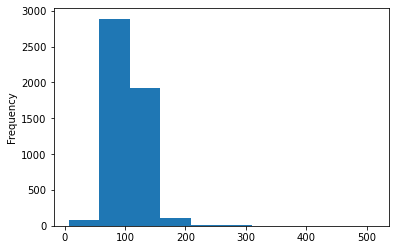

In [104]:
newmovies3.duration.plot(kind='hist')

Let's consider another dataset to understand different plotting choices. 

In [105]:
company = pd.read_csv('company.csv')
print(company.head())

  Name  sales_budget  marketing_budget  Income
0  PLP           123                90     400
1   MX           340                85     700
2   YP            45                55     210
3   UP            27                60     200
4   QT            80               100     225


In [106]:
company = pd.read_csv('company.csv')
company = company.set_index('Name')
print(company.head())

      sales_budget  marketing_budget  Income
Name                                        
PLP            123                90     400
MX             340                85     700
YP              45                55     210
UP              27                60     200
QT              80               100     225


We plot a scatter plot between the columns sales_budget and marketing_budget.

<AxesSubplot:xlabel='sales_budget', ylabel='marketing_budget'>

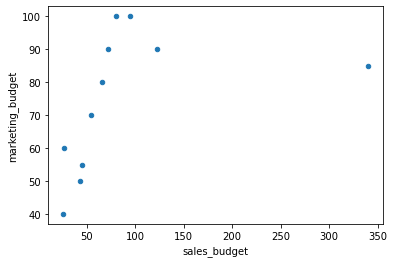

In [107]:
company.plot(kind='scatter', x='sales_budget', y='marketing_budget')

Creating a series with column sales_budget.

In [108]:
sales = company['sales_budget']
print(sales)

Name
PLP    123
MX     340
YP      45
UP      27
QT      80
AD      95
XC      26
MA      72
GP      66
LA      54
WT      43
Name: sales_budget, dtype: int64


Text(0, 0.5, 'Sales')

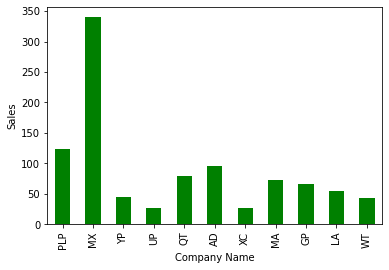

In [109]:
sales_plot = sales.plot(kind='bar', color='green')
sales_plot.set_xlabel("Company Name")
sales_plot.set_ylabel("Sales")

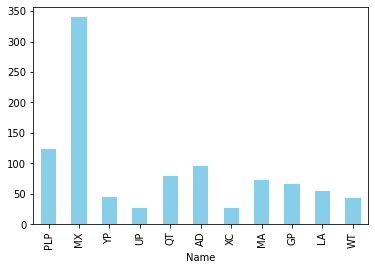

In [110]:
sales_plot = sales.plot(kind='bar', x="Company Name", y="Sales", color='skyblue')

Name
PLP     90
MX      85
YP      55
UP      60
QT     100
AD     100
XC      40
MA      90
GP      80
LA      70
WT      50
Name: marketing_budget, dtype: int64

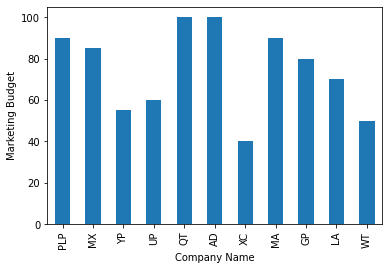

In [118]:
"""
In-class activity: Use the companies data frame and create a data 
series with company name and marketing budget. 
1) Create a bar graph with company name on the x-axis and 
marketing budget on the y-axis. 
"""

marketing = company['marketing_budget']
m_plot = marketing.plot(kind="bar", x="Name", y="marketing_budget")
m_plot.set_ylabel("Marketing Budget")
m_plot.set_xlabel("Company Name")

marketing

#### Important sites to get datasets from

https://archive.ics.uci.edu/ml/index.php

www.kaggle.com
